# Iris Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import seaborn as sns

from ibex import trans
from ibex.sklearn import linear_model as pd_linear_model
from ibex.sklearn import decomposition as pd_decomposition
from ibex.sklearn import preprocessing as pd_preprocessing
from ibex.sklearn import ensemble as pd_ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
iris, iris_te = model_selection.train_test_split(iris, stratify=iris['class'], test_size=0.1)
iris.reset_index(inplace=True)
iris_te.reset_index(inplace=True)

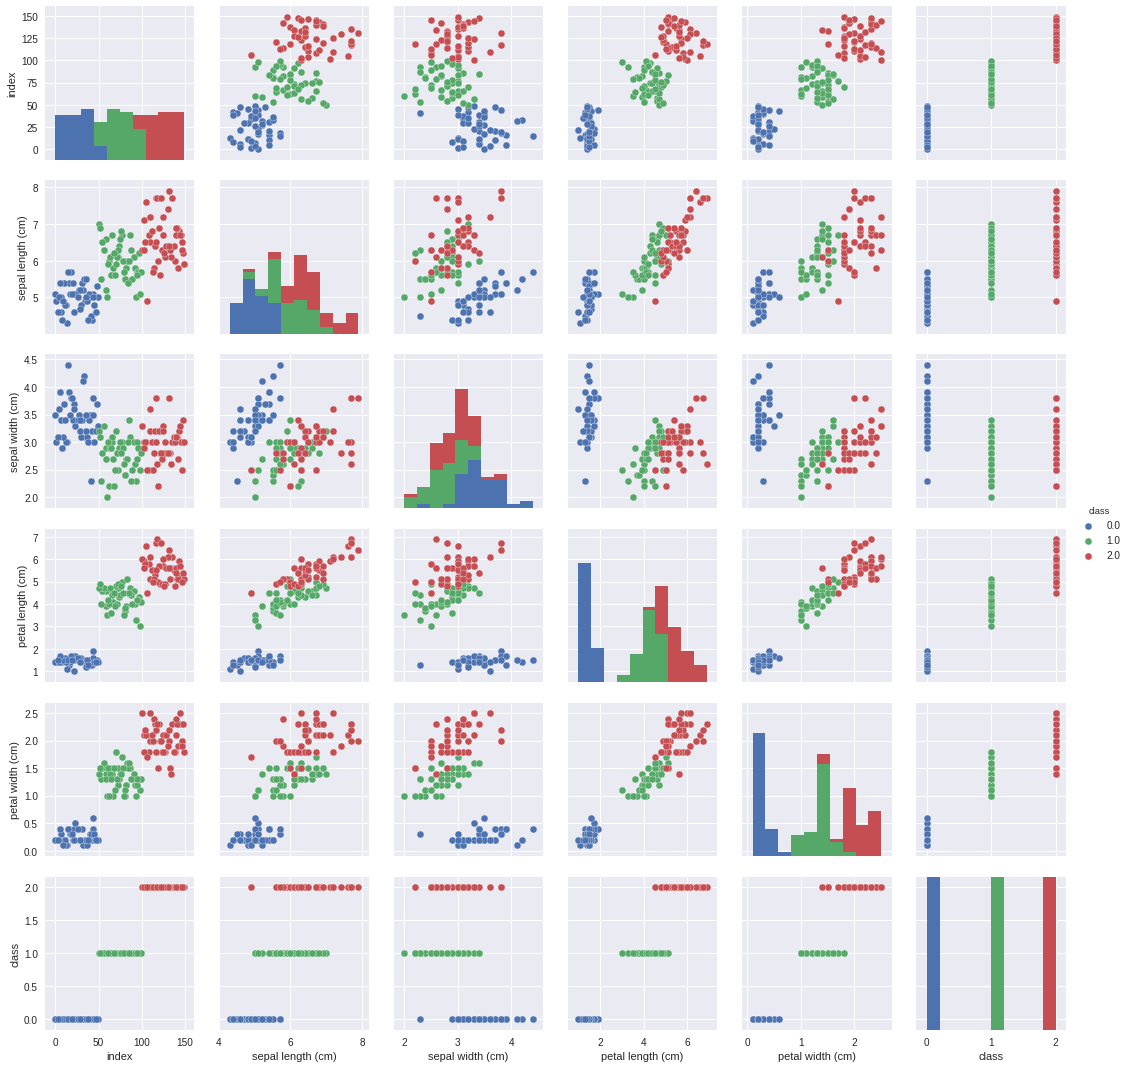

In [4]:
sns.pairplot(iris, 'class');

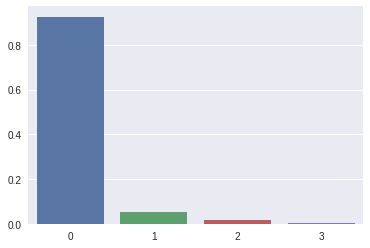

In [5]:
sns.barplot(
    data=pd.DataFrame(pd_decomposition.PCA().fit(iris[features]).explained_variance_ratio_).T);

In [6]:
decomp = trans(
    {('pc1', 'pc2'): pd_decomposition.PCA(n_components=2)}, 
    columns=features)

TypeError: trans() got an unexpected keyword argument 'columns'

In [7]:
pca = decomp.fit_transform(iris)
pca['class'] = iris['class']
sns.lmplot('pc1', 'pc2', data=pca, hue='class');

NameError: name 'decomp' is not defined

In [8]:
clf = decomp | pd_linear_model.LogisticRegression()
clf

Pipeline(steps=[('_functiontransformer', <ibex._function_transformer._FunctionTransformer object at 0x7fecad228470>), ('_adapter', _Adapter(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
     penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
     verbose=0, warm_start=False))])

In [9]:
scores = model_selection.cross_val_score(
    clf,
    X=iris,
    y=iris['class'],
    cv=10)
sns.boxplot(x=scores, orient='v');

AttributeError: '_Adapter' object has no attribute '_FrameMixin__cols'

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
scores = model_selection.cross_val_score(
    clf,
    X=iris,
    y=iris['class'],
    cv=10)
sns.boxplot(x=scores, orient='v');

In [8]:
import numpy as np
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']],
    columns=iris['feature_names']+['class'])

from ibex.sklearn.svm import SVC 
from ibex.sklearn.decomposition import PCA 
from ibex.sklearn.feature_selection import SelectKBest

clf = PCA(n_components=2) + SelectKBest(k=1) | SVC(kernel="linear")

In [9]:
clf

Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=None,
       transformer_list=[('d5399b45-980f-419d-850d-15f861313ad8', Adapter[PCA](copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False)), ('c1ebe3ab-b1db-475e-ab93-3ec6940617a3', Adapter[Sele... max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))])

In [10]:
clf.get_params()

{'_adapter': Adapter[SVC](C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
 '_adapter__C': 1.0,
 '_adapter__cache_size': 200,
 '_adapter__class_weight': None,
 '_adapter__coef0': 0.0,
 '_adapter__decision_function_shape': None,
 '_adapter__degree': 3,
 '_adapter__gamma': 'auto',
 '_adapter__kernel': 'linear',
 '_adapter__max_iter': -1,
 '_adapter__probability': False,
 '_adapter__random_state': None,
 '_adapter__shrinking': True,
 '_adapter__tol': 0.001,
 '_adapter__verbose': False,
 'featureunion': FeatureUnion(n_jobs=None,
        transformer_list=[('d5399b45-980f-419d-850d-15f861313ad8', Adapter[PCA](copy=True, iterated_power='auto', n_components=2, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False)), ('c1ebe3ab-b1db-475e-ab93-3ec6940617a3', Adapter[SelectKBest](k=1, score_func=<func

In [11]:
clf.steps

[('featureunion', FeatureUnion(n_jobs=None,
         transformer_list=[('d5399b45-980f-419d-850d-15f861313ad8', Adapter[PCA](copy=True, iterated_power='auto', n_components=2, random_state=None,
       svd_solver='auto', tol=0.0, whiten=False)), ('c1ebe3ab-b1db-475e-ab93-3ec6940617a3', Adapter[SelectKBest](k=1, score_func=<function f_classif at 0x7fd7f8b33e18>))],
         transformer_weights=None)),
 ('_adapter', Adapter[SVC](C=1.0, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
       max_iter=-1, probability=False, random_state=None, shrinking=True,
       tol=0.001, verbose=False))]

In [14]:
from sklearn.pipeline import FeatureUnion

In [17]:
FeatureUnion([('a', pd_linear_model.LinearRegression()), ('b', pd_linear_model.LinearRegression())])

FeatureUnion(n_jobs=1,
       transformer_list=[('a', Adapter[LinearRegression](copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)), ('b', Adapter[LinearRegression](copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))],
       transformer_weights=None)

In [22]:
from sklearn import linear_model
type(linear_model.LinearRegression())

sklearn.linear_model.base.LinearRegression

In [24]:
pd_linear_model.LinearRegression.__name__ = 'moshe'

In [26]:
type(pd_linear_model.LinearRegression).__name__

'ABCMeta'

In [30]:
pd_linear_model.LinearRegression.__name__ = 'moshe'
pd_linear_model.LinearRegression.__name__

'moshe'

In [29]:
linear_model.LinearRegression.__name__

'LinearRegression'

In [3]:
type(pd_linear_model.LinearRegression()).__name__

'LinearRegression'